In [1]:
from sklearn import svm
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv('data/server_data.csv', header=None)
dataset.head()

,0,1
0,13.047,14.741
1,13.409,13.763
2,14.196,15.853
3,14.915,16.174
4,13.577,14.043


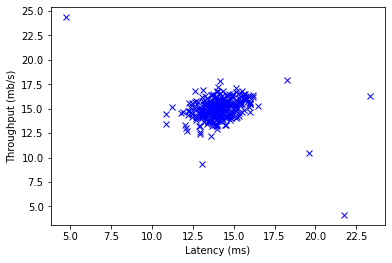

In [3]:
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(dataset.values[:,0],dataset.values[:,1],'bx')
plt.show()

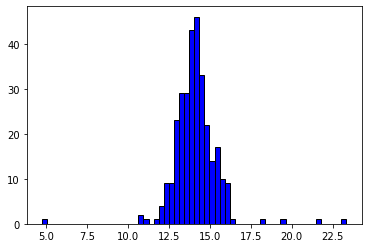

In [4]:
plt1 = plt.hist(dataset.values[:,0], color = 'blue', edgecolor = 'black',
         bins = 60)

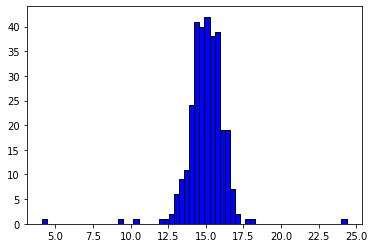

In [5]:
plt1 = plt.hist(dataset.values[:,1], color = 'blue', edgecolor = 'black',
         bins = 60)

In [6]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(dataset.values)

OneClassSVM(gamma=0.1, nu=0.05)

In [7]:
pred = clf.predict(dataset.values)

In [8]:
normal = dataset.values[pred == 1]
abnormal = dataset.values[pred == -1]

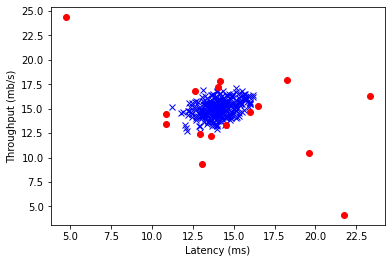

In [9]:
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [10]:
scores = clf.score_samples(dataset.values)
normal = dataset.values[scores >= 3.5]
abnormal = dataset.values[scores < 3.5]

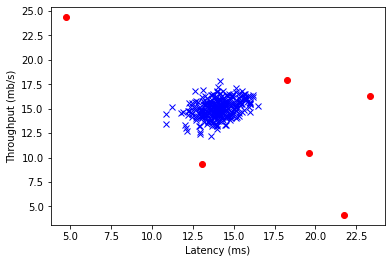

In [11]:
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()